In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import io
import requests
import sklearn
%matplotlib inline

# Q1 Import and store the data in a data frame. 

In [7]:
ds = pd.read_csv('http://www.stat.ufl.edu/~winner/data/airq402.dat',delim_whitespace=1,header = None)

In [8]:
ds.head()

,0,1,2,3,4,5,6,7,8,9,10
0,CAK,ATL,114.47,528,424.56,FL,70.19,111.03,FL,70.19,111.03
1,CAK,MCO,122.47,860,276.84,FL,75.10,123.09,DL,17.23,118.94
2,ALB,ATL,214.42,852,215.76,DL,78.89,223.98,CO,2.77,167.12
3,ALB,BWI,69.40,288,606.84,WN,96.97,68.86,WN,96.97,68.86
4,ALB,ORD,158.13,723,313.04,UA,39.79,161.36,WN,15.34,145.42


In [9]:
url="http://users.stat.ufl.edu/~winner/data/airq402.dat"
s=requests.get(url).text

In [10]:
s=s.replace('     ', ';')

In [11]:
s=s.replace('     ', ';')
s=s.replace('    ', ';')
s=s.replace('   ', ';')
s=s.replace('  ', ';')
s=s.replace(' ', ';')

In [12]:
new_s = s.split('\r\n')


In [13]:
df = pd.DataFrame(new_s)
df = df[0].str.split(';', expand=True)  # When using expand=True, the split elements will expand out into separate columns.


In [7]:

col_names = ['City1', 'City2', 'Average_fare', 'Distance', 'Average_weekly_passengers', 'market_leading_airline', 
             'market_share', 'average_fare_2','Low_price_airline','market_share_2','price']
cols=['City1','City2','Low_price_airline','market_leading_airline']

In [8]:
len(col_names)

11

In [9]:
df.columns = col_names

In [10]:
df.head()

,City1,City2,Average_fare,Distance,Average_weekly_passengers,market_leading_airline,market_share,average_fare_2,Low_price_airline,market_share_2,price
0,CAK,ATL,114.47,528,424.56,FL,70.19,111.03,FL,70.19,111.03
1,CAK,MCO,122.47,860,276.84,FL,75.10,123.09,DL,17.23,118.94
2,ALB,ATL,214.42,852,215.76,DL,78.89,223.98,CO,2.77,167.12
3,ALB,BWI,69.40,288,606.84,WN,96.97,68.86,WN,96.97,68.86
4,ALB,ORD,158.13,723,313.04,UA,39.79,161.36,WN,15.34,145.42


# Q2 Remove the outliers from the data 

In [11]:
#Analysing the data

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001 entries, 0 to 1000
Data columns (total 11 columns):
City1                        1001 non-null object
City2                        1000 non-null object
Average_fare                 1000 non-null object
Distance                     1000 non-null object
Average_weekly_passengers    1000 non-null object
market_leading_airline       1000 non-null object
market_share                 1000 non-null object
average_fare_2               1000 non-null object
Low_price_airline            1000 non-null object
market_share_2               1000 non-null object
price                        1000 non-null object
dtypes: object(11)
memory usage: 86.1+ KB


In [13]:
col_to_int=['Average_fare','Distance','Average_weekly_passengers','market_share','average_fare_2',
                'market_share_2','price']
df2=df[col_to_int].apply(pd.to_numeric, errors='coerce')              # convered columns to float dtype

In [14]:
df_copy = df.copy()

In [15]:
df_copy[col_to_int]=df_copy[col_to_int].apply(pd.to_numeric,errors='coerce') # combines two dataframe columns

In [16]:
df_copy.dropna(how='any', axis=0,inplace = True)# Dataset cleaning

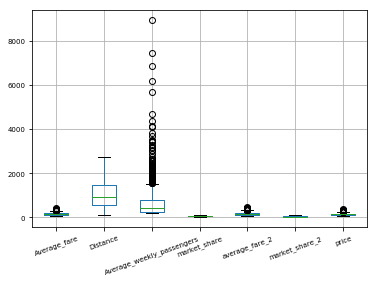

In [17]:
df_copy.boxplot(rot=20 ,fontsize = 7 ) # plot boxplot to identify outliers in the dataset

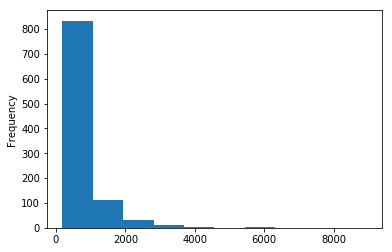

In [18]:
df_copy.Average_weekly_passengers.plot.hist(bins=10)

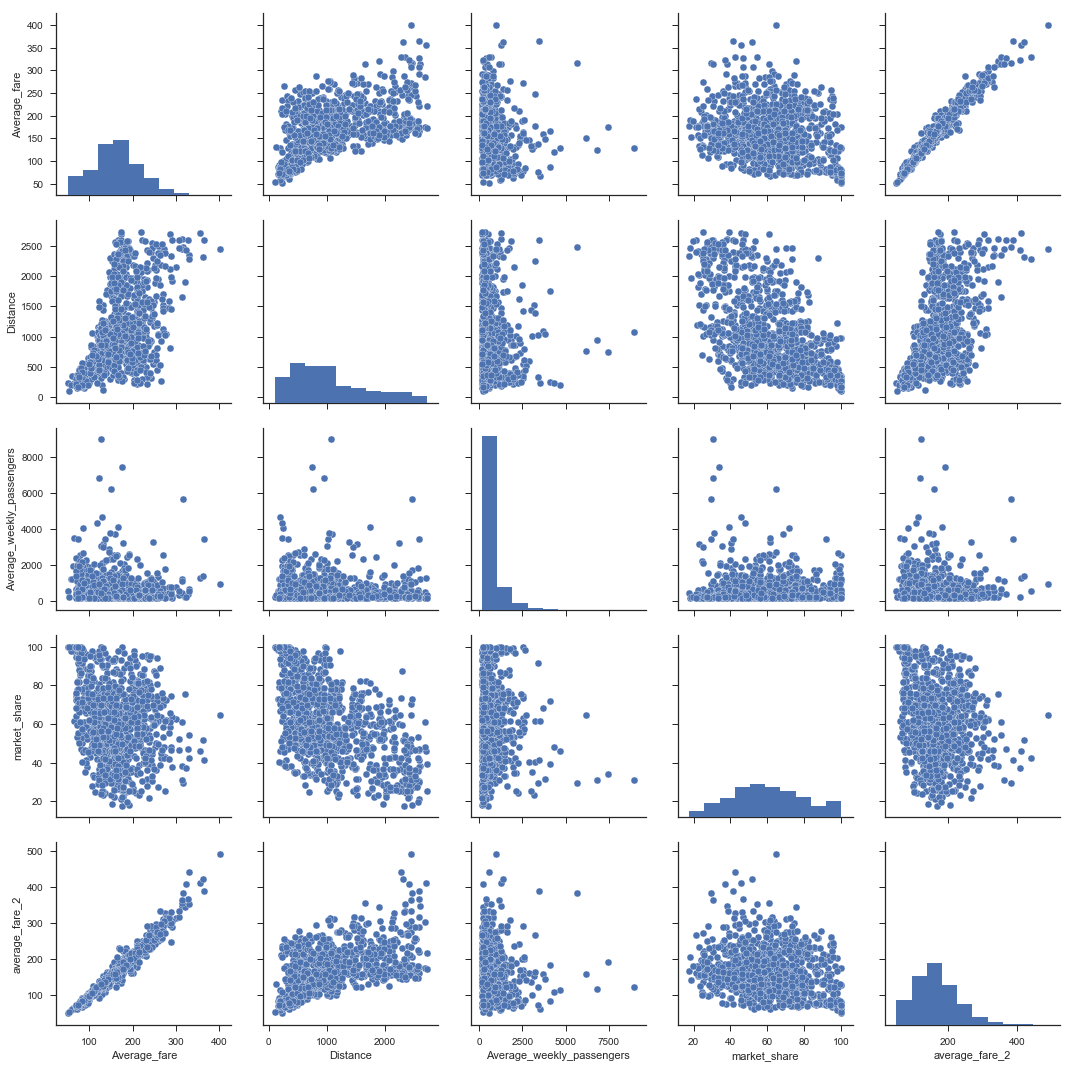

In [19]:
sns.set(style="ticks", color_codes=True)
sns.pairplot(df_copy.dropna(), size=3, kind='scatter',vars=col_to_int[:5])

ASSUMPTION
As the 'Average_weekly_passengers' data is highly skewed, I am removing outliers from this column corresponding to all rows and not considering other
variables as the impact seems to be low.
I drew comparision by removing outliers from all the columns, in that case a lot of meaningfull data were getting removed.

In [20]:
q1=df_copy.Average_weekly_passengers.quantile(0.25)
q3=df_copy.Average_weekly_passengers.quantile(0.75)
IQR=q3-q1

In [21]:
df3= df2[~((df2 < (q1 - 1.5 * IQR)) | (df2 > (q3 + 1.5 * IQR))).any(axis=1)]
df3

,Average_fare,Distance,Average_weekly_passengers,market_share,average_fare_2,market_share_2,price
0,114.47,528.0,424.56,70.19,111.03,70.19,111.03
1,122.47,860.0,276.84,75.10,123.09,17.23,118.94
2,214.42,852.0,215.76,78.89,223.98,2.77,167.12
3,69.40,288.0,606.84,96.97,68.86,96.97,68.86
4,158.13,723.0,313.04,39.79,161.36,15.34,145.42
5,135.17,1204.0,199.02,40.68,137.97,17.09,127.69
8,129.35,1073.0,550.54,76.84,127.69,76.84,127.69
9,134.17,1130.0,202.93,35.40,132.91,26.40,124.78
10,212.49,1269.0,198.80,68.39,226.79,11.91,200.93
12,170.67,1121.0,364.78,45.94,174.62,33.87,163.22


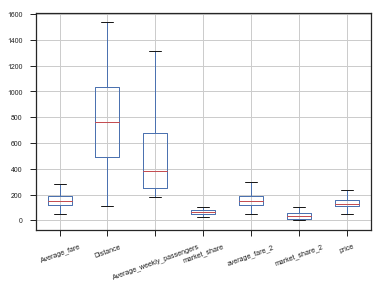

In [22]:
df3.boxplot(rot=20 ,fontsize = 7 )

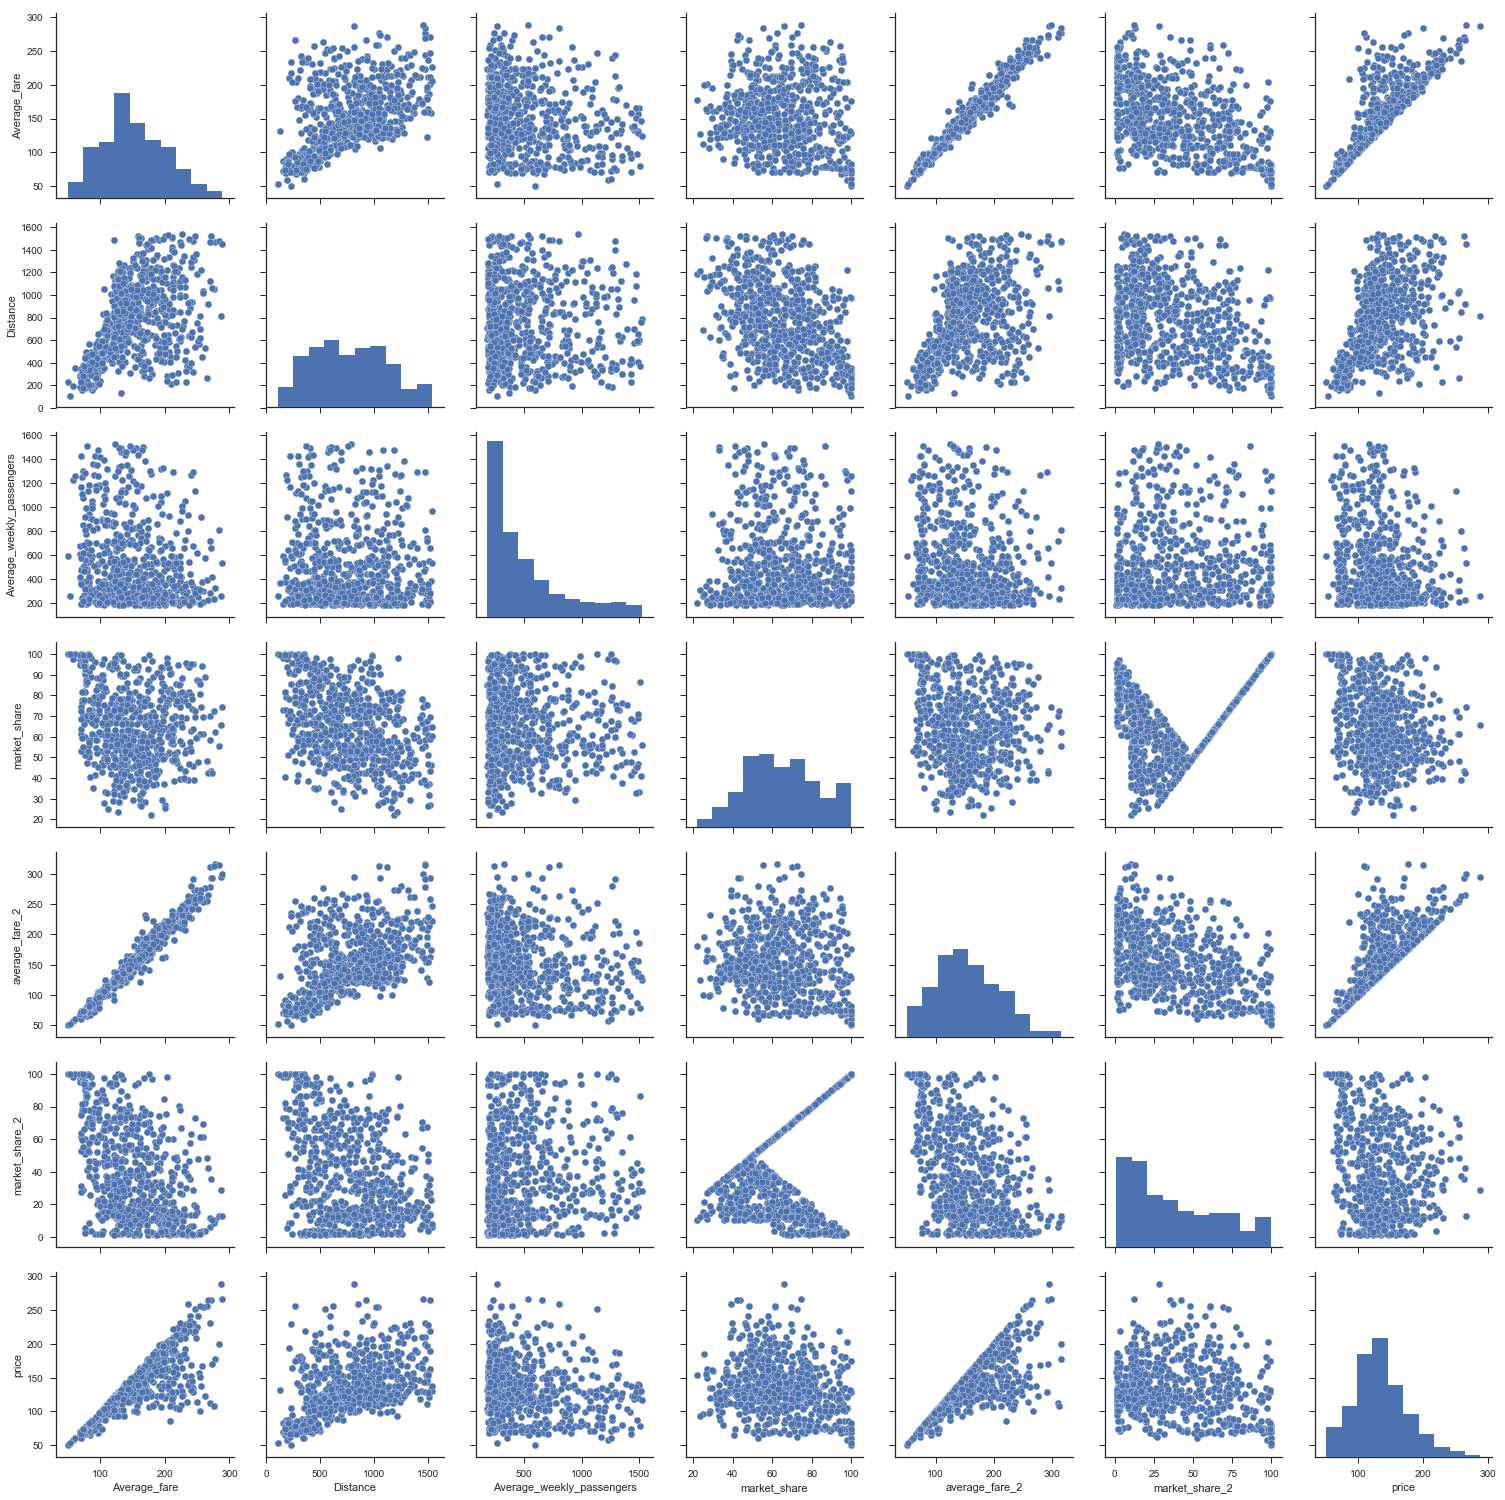

In [23]:
# plot after removing outliers

sns.set(style="ticks", color_codes=True)
sns.pairplot(df3.dropna(), size=3, kind='scatter')  

# Q3- Treat “Average Fare” 3rdColumn as your Dependent Variable and Rest of the columns as Independent Variable.

In [24]:
result_df = pd.concat([df_copy, df3], axis=1 , ignore_index=False,)
result_df.dropna(how='any', axis=0,inplace = True)
print(result_df.columns.unique())

Index(['City1', 'City2', 'Average_fare', 'Distance',
       'Average_weekly_passengers', 'market_leading_airline', 'market_share',
       'average_fare_2', 'Low_price_airline', 'market_share_2', 'price'],
      dtype='object')


In [25]:
model = pd.DataFrame(result_df.T.drop_duplicates().T)
model.head()

,City1,City2,Average_fare,Distance,Average_weekly_passengers,market_leading_airline,market_share,average_fare_2,Low_price_airline,market_share_2,price
0,CAK,ATL,114.47,528,424.56,FL,70.19,111.03,FL,70.19,111.03
1,CAK,MCO,122.47,860,276.84,FL,75.1,123.09,DL,17.23,118.94
2,ALB,ATL,214.42,852,215.76,DL,78.89,223.98,CO,2.77,167.12
3,ALB,BWI,69.4,288,606.84,WN,96.97,68.86,WN,96.97,68.86
4,ALB,ORD,158.13,723,313.04,UA,39.79,161.36,WN,15.34,145.42


In [26]:
model['Average_fare']=model.Average_fare.astype(float)
model['Average_weekly_passengers']=model.Average_weekly_passengers.astype(float)
model['market_share']=model.market_share.astype(float)
model['average_fare_2']=model.average_fare_2.astype(float)
model['market_share_2']=model.market_share_2.astype(float)
model['price']=model.price.astype(float)
model['Distance']=model.Distance.astype(float)

In [27]:
# Independent variables
x_var=model[['City1','City2', 'Average_fare', 'Distance', 'Average_weekly_passengers', 'market_leading_airline', 
             'market_share', 'average_fare_2','Low_price_airline','market_share_2','price']]

In [28]:
# Dependent Variable
y_var=model['Average_fare']

Note - See below for dummy columns created for categorical variables

# Q4-Drop the independent variables which has less than 0.1 correlation with the dependent variable 

Binary Encoding
In this technique, first the categories are encoded as ordinal, then those integers are converted 
into binary code, then the digits from that binary string are split
into separate columns. This encodes the data in fewer dimensions than one-hot.
Instructions :
Invoke the BinaryEncoder function by specifying the columns you want to
encode and then call the .fit_transform() method on it with the DataFrame as the argument.

In [39]:
import sklearn
import category_encoders as ce 

In [40]:
encoder = ce.BinaryEncoder(cols=['market_leading_airline','Low_price_airline','City1','City2']) 
df_dummy = encoder.fit_transform(model)
df_dummy.head()

,market_leading_airline_0,market_leading_airline_1,market_leading_airline_2,market_leading_airline_3,market_leading_airline_4,Low_price_airline_0,Low_price_airline_1,Low_price_airline_2,Low_price_airline_3,Low_price_airline_4,...,City2_5,City2_6,City2_7,Average_fare,Distance,Average_weekly_passengers,market_share,average_fare_2,market_share_2,price
0,0,0,0,0,1,0,0,0,0,0,...,0,0,1,114.47,528.0,424.56,70.19,111.03,70.19,111.03
1,0,0,0,0,1,0,0,0,0,1,...,0,1,0,122.47,860.0,276.84,75.10,123.09,17.23,118.94
2,0,0,0,1,0,0,0,0,0,1,...,0,0,1,214.42,852.0,215.76,78.89,223.98,2.77,167.12
3,0,0,0,1,1,0,0,0,1,0,...,0,1,1,69.40,288.0,606.84,96.97,68.86,96.97,68.86
4,0,0,1,0,0,0,0,0,1,0,...,1,0,0,158.13,723.0,313.04,39.79,161.36,15.34,145.42


In [41]:
pd.DataFrame(df_dummy.corr().iloc[:,-7] > 0.1)

,Average_fare
market_leading_airline_0,False
market_leading_airline_1,False
market_leading_airline_2,True
market_leading_airline_3,False
market_leading_airline_4,False
Low_price_airline_0,False
Low_price_airline_1,False
Low_price_airline_2,True
Low_price_airline_3,False
Low_price_airline_4,False


In [42]:
df_dummies = df_dummy[['market_leading_airline_2','Low_price_airline_2','City1_3','City2_4','City2_5','Average_fare','Distance','average_fare_2','price']]
df_dummies.head()

,market_leading_airline_2,Low_price_airline_2,City1_3,City2_4,City2_5,Average_fare,Distance,average_fare_2,price
0,0,0,0,0,0,114.47,528.0,111.03,111.03
1,0,0,0,0,0,122.47,860.0,123.09,118.94
2,0,0,0,0,0,214.42,852.0,223.98,167.12
3,0,0,0,0,0,69.40,288.0,68.86,68.86
4,1,0,0,0,1,158.13,723.0,161.36,145.42


After removing independent variables with less that 0.1 correlation with the dependent variable ' Average_fare', the following
independent variables are left -

market_leading_airline_2 
Low_price_airline_2
City1_3
City2_4
City2_5
Distance
average_fare_2'

# Q5 - Create scatter Plot of Independent Variable vs Dependent Variable. 

H:\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
H:\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


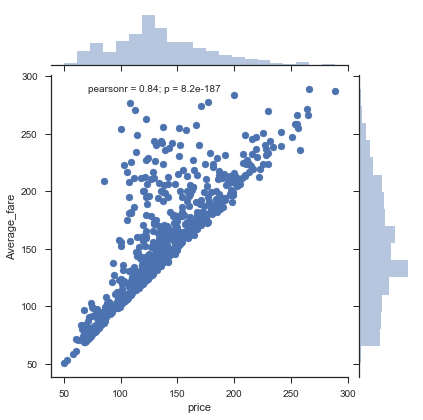

In [43]:
import seaborn as sns 
sns.jointplot(x="price", y="Average_fare", data=df_dummies)

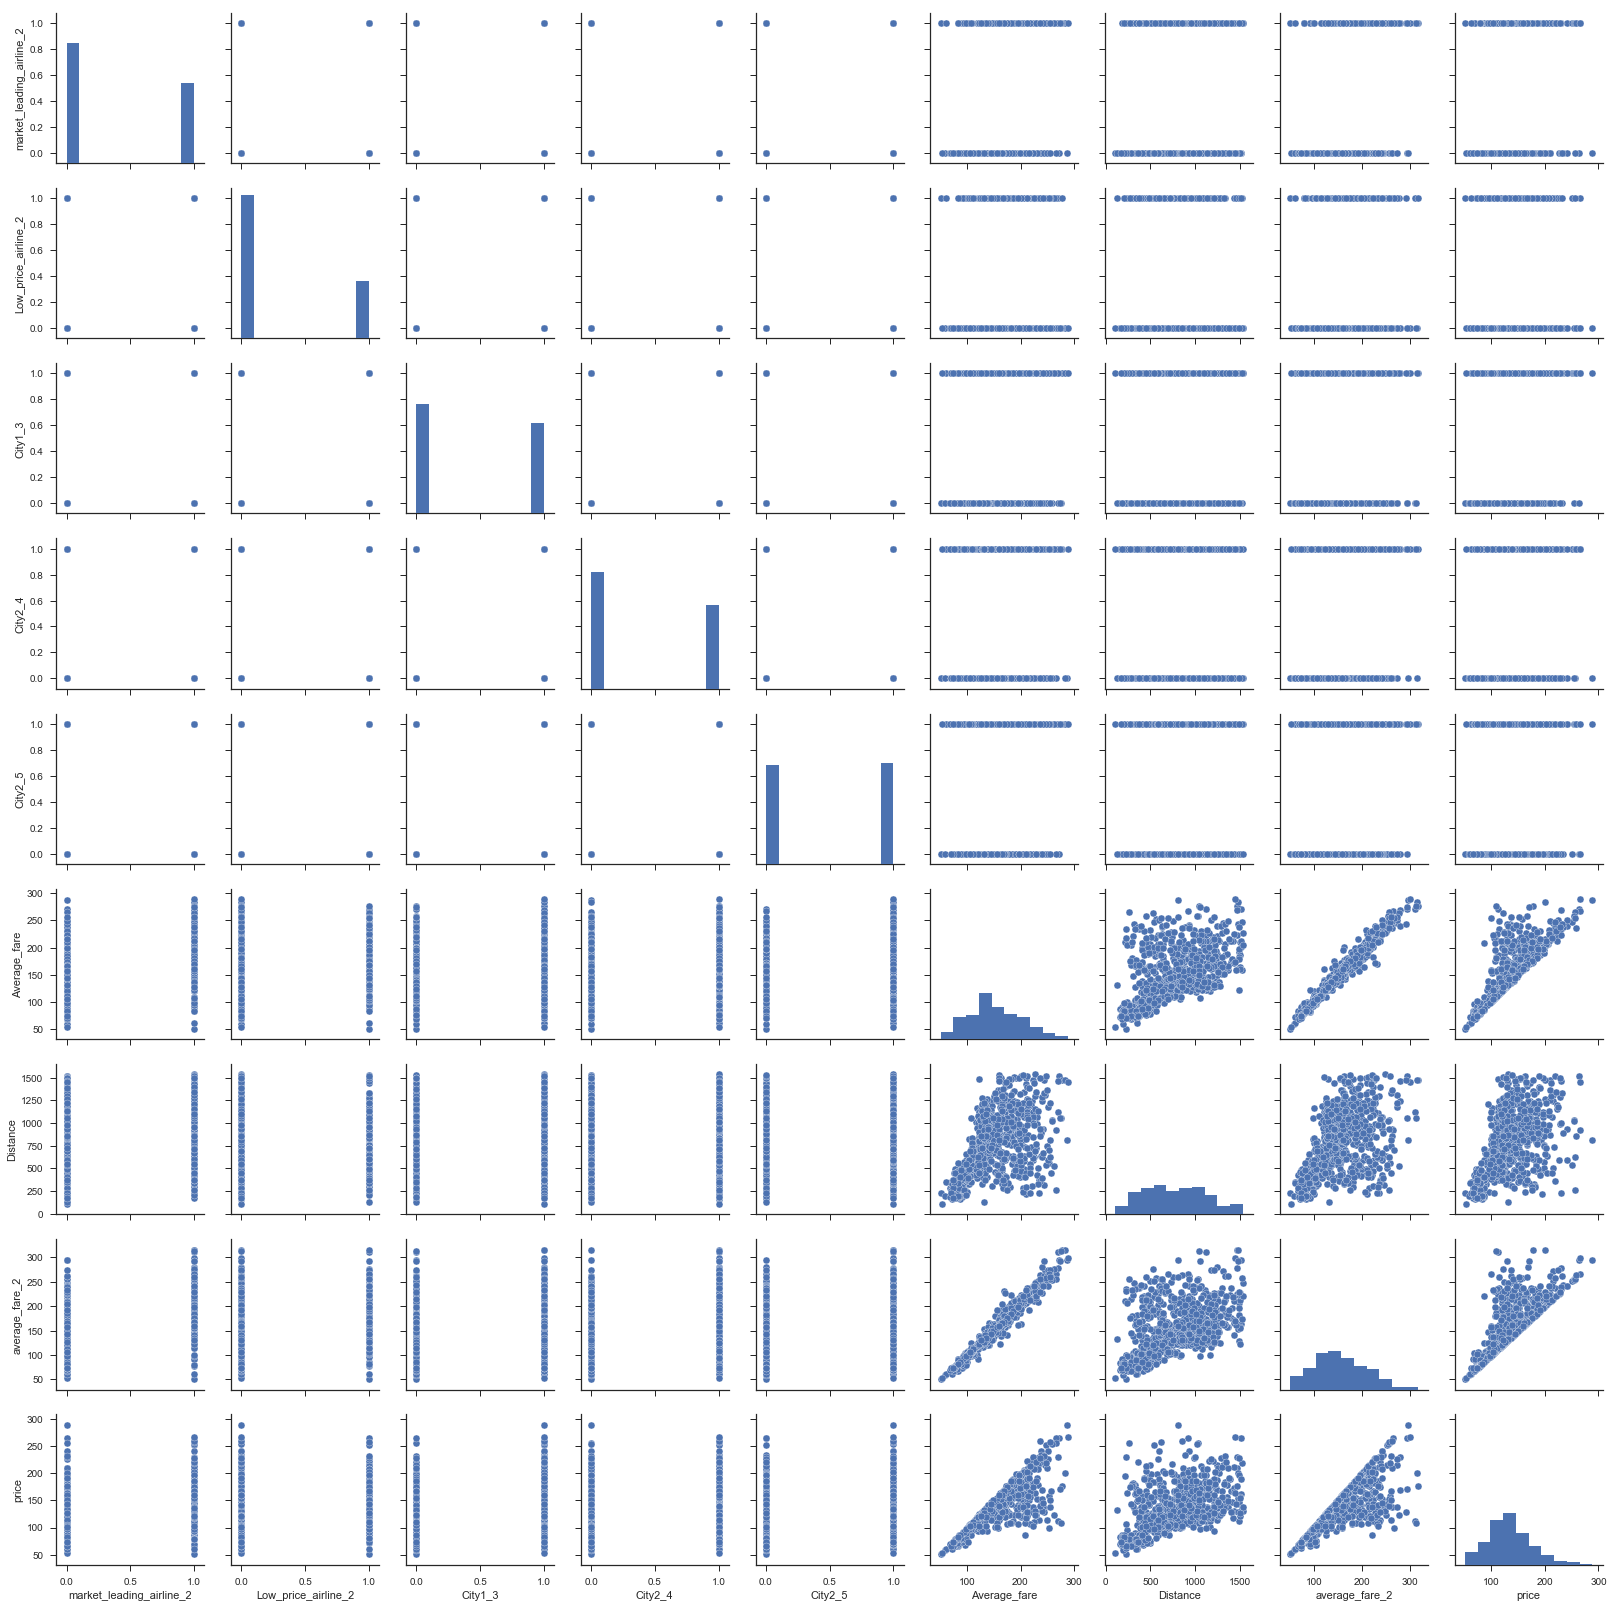

In [44]:
sns.pairplot(df_dummies,kind = 'scatter')

# Q6 - Divide the data set into training and test data set and build a Multiple Linear Regression model.

In [45]:
#Dependent variable
y= df_dummies['Average_fare']

In [46]:
#Independent variables
x=df_dummies[['market_leading_airline_2','Low_price_airline_2','City1_3','City2_4','City2_5','Distance','average_fare_2','price']] 


In [47]:
from sklearn.model_selection import train_test_split

In [48]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=100) #Setting test_size = 30% 

In [49]:
#Training the Model
from sklearn.linear_model import LinearRegression

In [50]:
lm=LinearRegression()

In [51]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [53]:
# Predicting Test Data
predictions = lm.predict( X_test)
predictions

array([199.85004352, 156.46370938, 113.22486011, 180.84956029,
       236.41302182,  98.4450311 , 128.0283819 , 214.58323514,
       176.13707006, 152.80212639, 139.17791969, 143.07052875,
       164.30318495, 138.22486474, 123.72107852, 149.26444958,
       161.61508266, 132.5076304 , 155.87718843, 160.13899155,
       147.73293356, 135.10105921, 170.13099773, 183.36414791,
       167.64833068, 136.17709443, 209.35983036, 106.27917733,
       147.97207643, 116.50831125, 160.34970336, 103.8693025 ,
       134.72204623, 136.40900401,  72.73621599,  76.95432059,
       163.58778872, 207.89118808, 224.63848955, 210.13700116,
       165.41290707, 141.93897928,  84.5896277 , 132.73849712,
       124.89211247,  83.96072187, 175.54107017, 130.73424173,
       167.4368713 , 164.06173324, 178.13574508,  87.55173509,
       125.79675116, 123.69250295, 147.74322793, 152.11146058,
       177.08097397, 190.02716131, 196.85902487, 197.60049917,
       147.3118786 , 223.34015685, 173.18728252, 186.54

Text(0,0.5,'Predicted Y')

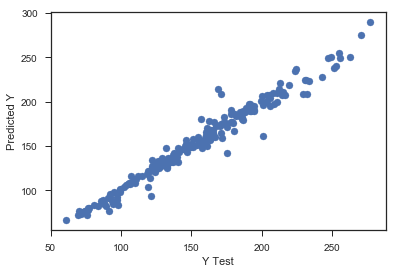

In [54]:
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

# Q7 - Print the coefficients & intercepts of the linear regression model (5 points)

In [56]:
coeffecients = pd.DataFrame(lm.coef_,x.columns)
coeffecients.columns = ['Coeffecient']
coeffecients

,Coeffecient
market_leading_airline_2,-0.089341
Low_price_airline_2,2.040930
City1_3,-0.298371
City2_4,-0.932804
City2_5,0.949148
Distance,-0.000339
average_fare_2,0.802860
price,0.161171


In [61]:
print(lm.intercept_)

6.378731612326334


# Q8 - Print the accuracy of the overall model 

H:\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


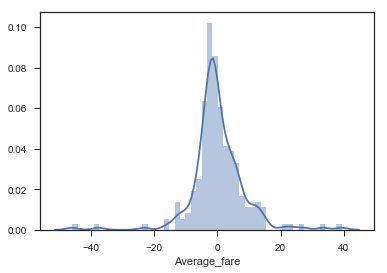

In [64]:
sns.distplot((y_test-predictions),bins=50);

In [65]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions)) 
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions))) 

MAE: 5.355758405685196
MSE: 71.10846708133684
RMSE: 8.432583653977993


In [66]:
r_squared = metrics.r2_score(y_test,predictions)
r_squared

0.967383341713866